<a href="https://colab.research.google.com/github/Swapn2/deep_learning/blob/main/transfer_learning_feature_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Flatten
from keras.applications.vgg16 import VGG16

In [3]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False, # removing the fully cinnected lyr
    input_shape = (150,150 ,3),
)

In [6]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


for layer in conv_base.layers:
  print(layer.name, layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [8]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [9]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(150,150)
)

Found 8005 files belonging to 2 classes.


In [10]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

Found 2023 files belonging to 2 classes.


In [11]:
def process(image, label):
  image = tensorflow.cast(image/255. , tensorflow.float32)
  return image , label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [14]:
model.compile(optimizer= keras.optimizers.RMSprop(learning_rate = 1e-5),loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs =10 , validation_data = test_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 182ms/step - accuracy: 0.8303 - loss: 0.3899 - val_accuracy: 0.9066 - val_loss: 0.2100
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 61s 150ms/step - accuracy: 0.9291 - loss: 0.1768 - val_accuracy: 0.9115 - val_loss: 0.2066
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 44s 162ms/step - accuracy: 0.9504 - loss: 0.1277 - val_accuracy: 0.9135 - val_loss: 0.2129
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 148ms/step - accuracy: 0.9674 - loss: 0.0931 - val_accuracy: 0.8957 - val_loss: 0.2746
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.9780 - loss: 0.0661 - val_accuracy: 0.9259 - val_loss: 0.2078
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - accuracy: 0.9875 - loss: 0.0473 - val_accuracy: 0.9140 - val_loss: 0.2542
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - accuracy: 0.9945 - loss: 0.0296 - val_accuracy: 0.9362 - val_loss: 0.1793
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 148ms/step - accuracy: 0.9963 - loss: 0

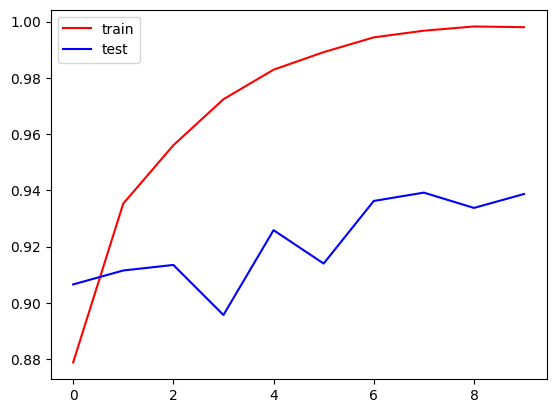

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

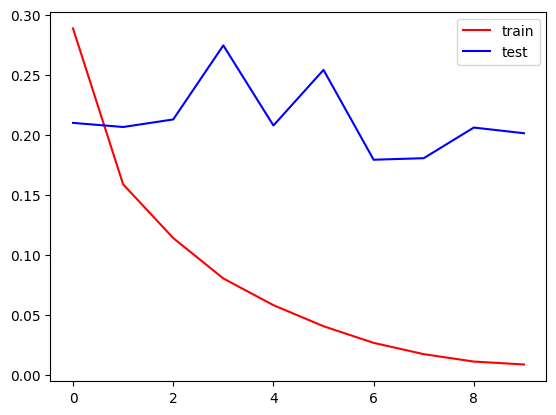

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()